In [1]:
import pandas as pd

# The U.S. National Epidemiological Survey on Alcohol and Related Conditions (NESARC) is a survey
# designed to determine the magnitude of alcohol use and psychiatric disorders in the U.S. population. 
# It is a representative sample of the non-institutionalized population 18 years and older.
#
# Selected variables
# AGE - AGE (AGE IN YEARS)
# S1Q10A - TOTAL PERSONAL INCOME IN THE LAST 12 MONTHS (INCOME IN DOLLARS)
# MAJORDEP12 - MAJOR DEPRESSION IN THE LAST 12 MONTHS (NON-HIERARCHICAL) (
#     0 - No,
#     1 - Yes)
# ALCABDEP12DX - ALCOHOL ABUSE/DEPENDENCE IN THE LAST 12 MONTHS (
#     0 - No alcohol diagnosis,
#     1 - Alcohol abuse only,
#     2 - Alcohol dependence only,
#     3 - Alcohol abuse and dependence)
# TAB12MDX - NICOTINE DEPENDENCE IN THE LAST 12 MONTHS (
#     0 - No nicotine dependence,
#     1 - Nicotine dependence)

cols = ['AGE', 'S1Q10A', 'MAJORDEP12', 'ALCABDEP12DX', 'TAB12MDX']

# Load the data
df = pd.read_csv('nesarc.csv', usecols=cols, low_memory=False)

In [2]:
# Print first 5 rows of the data set
print(df.head())

   AGE  S1Q10A  MAJORDEP12  ALCABDEP12DX  TAB12MDX
0   23   17500           0             0         0
1   28   11000           0             0         0
2   81    6000           0             0         0
3   18   27000           0             0         0
4   36   42000           0             0         0


In [3]:
# Store feature matrix X and response vector y
X = df[['AGE', 'S1Q10A', 'ALCABDEP12DX', 'TAB12MDX']]
y = df.MAJORDEP12

In [4]:
print(X.shape)
print(y.shape)

(43093, 4)
(43093L,)


In [5]:
# Split the dataset into a training set and a testing set
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [6]:
# Import a classifier and fit the model
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
# Display the relative importance of each attribute
import numpy as np

print(np.around(clf.feature_importances_, decimals=2))

[ 0.35  0.58  0.03  0.04]


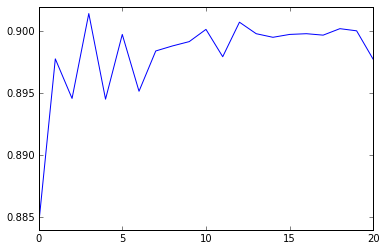

In [19]:
# Run a different number of trees
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt
%matplotlib inline

trees = range(25)
accuracy= np.zeros(25)

for idx in range(len(trees)):
    clf = RandomForestClassifier(n_estimators=idx + 1)
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy[idx] = accuracy_score(y_test, predictions)

plt.plot(trees, accuracy)
plt.xlim(0, 20)
plt.show()

In [20]:
# Compute classification accuracy for the random forest model 
clf = RandomForestClassifier(n_estimators=15)
clf.fit(X_train, y_train)

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

print('Train accuracy: {0}'.format(round(accuracy_score(y_train, y_train_pred), 2)))
print('Test accuracy: {0}'.format(round(accuracy_score(y_test, y_test_pred), 2)))

Train accuracy: 0.95
Test accuracy: 0.9


In [21]:
# Create a confusion matrix 
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[15418   447]
 [ 1300    73]]


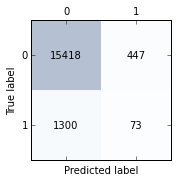

In [22]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i,
        s=confmat[i, j],
        va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [12]:
# Model interpretation for the random forest
#
# Random forest analysis was performed to evaluate the importance of a series
# of explanatory variables in predicting a binary, categorical response variable.
#
# The following explanatory variables were included as possible contributors to a random forest
# evaluating major depression in the last 12 months: age, total personal imcome,
# alcohol abuse/dependence and nicotine dependence in the last 12 months.
#
# The explanatory variables with the highest relative importance scores were total personal income and
# age. The test accuracy of the model is 90% with the number of 15418 true negatives, 
# 1300 false negatives, 73 true positives and 447 false positives predicted on the train set. 